<a href="https://colab.research.google.com/github/DhrubaAdhikary/Learn_CV_with_Dhruv/blob/master/Corrected_Harris_HOG_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Harris Corner Detection and HOG Feature Extraction
This notebook demonstrates how to compute Harris corners and HOG features for a given grayscale image using OpenCV and Scikit-Image. Make sure your working directory contains `input_image.jpeg`.

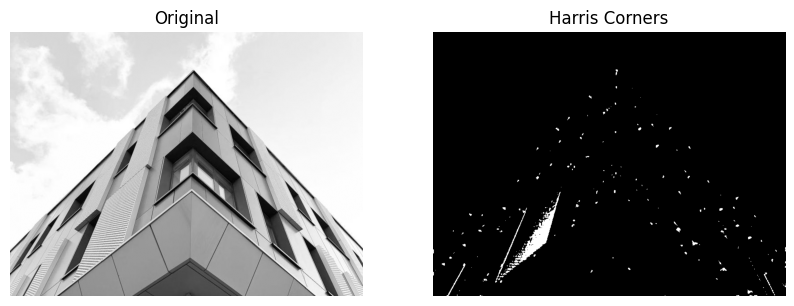

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread('input_image.jpeg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError("input_image.jpeg not found in working directory.")

# Step 1: Compute gradients using Sobel operator
Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Step 2: Derivative products
Ix2 = Ix ** 2
Iy2 = Iy ** 2
Ixy = Ix * Iy

# Step 3: Gaussian smoothing
Ix2 = cv2.GaussianBlur(Ix2, (5, 5), 1)
Iy2 = cv2.GaussianBlur(Iy2, (5, 5), 1)
Ixy = cv2.GaussianBlur(Ixy, (5, 5), 1)

# Step 4: Harris response
k = 0.04
det_M = Ix2 * Iy2 - Ixy ** 2
trace_M = Ix2 + Iy2
R = det_M - k * (trace_M ** 2)

# Step 5: Threshold on R
threshold = 0.01 * R.max()
corner_map = np.zeros_like(image)
corner_map[R > threshold] = 255

# Step 6: Plot original and corners
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Harris Corners")
plt.imshow(corner_map, cmap="gray")
plt.axis("off")
plt.show()


In [2]:

from ipywidgets import interact, IntSlider, FloatSlider

def harris_corner_detection(block_size, ksize, k):
    img = cv2.imread('input_image.jpeg', cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Error: 'input_image.jpeg' not found.")
        return

    img_float = np.float32(img)
    corners = cv2.cornerHarris(img_float, int(block_size), int(ksize), k)
    corners_dilated = cv2.dilate(corners, None)
    img_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img_corners[corners_dilated > 0.01 * corners_dilated.max()] = [0, 0, 255]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Harris Corners')
    plt.imshow(cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

interact(
    harris_corner_detection,
    block_size=IntSlider(value=2, min=2, max=10, step=1, description='Block Size:'),
    ksize=IntSlider(value=3, min=3, max=31, step=2, description='Kernel Size:'),
    k=FloatSlider(value=0.04, min=0.01, max=0.1, step=0.01, description='k Parameter:')
)


interactive(children=(IntSlider(value=2, description='Block Size:', max=10, min=2), IntSlider(value=3, descrip…

<function __main__.harris_corner_detection(block_size, ksize, k)>

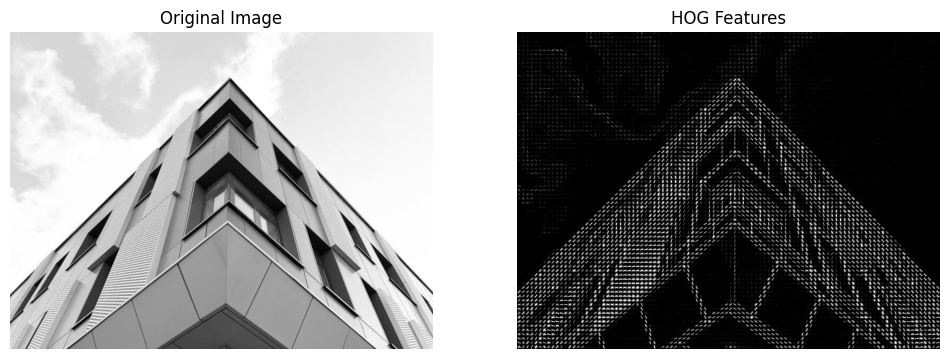

HOG Features Shape: (263736,)


In [3]:

from skimage.feature import hog
from skimage import exposure

# Step 1: Load image
image = cv2.imread('input_image.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("input_image.jpeg not found for HOG section.")

# Step 2: Compute HOG features
features, hog_image = hog(image,
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualize=True,
                          block_norm='L2-Hys')

# Step 3: Rescale HOG image
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Step 4: Plot original and HOG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG Features')
ax2.axis('off')
plt.show()

print("HOG Features Shape:", features.shape)
